In [1]:
import os
import sys
import glob 
from functools import reduce
import seaborn as sb
import pandas as pd
import random

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
sys.path.append("../")
from simulation.cloud import *
from simulation.data import *
from simulation.plot import *
from simulation.log import *
from simulation.utils import plot_ecdf, ecdf

In [4]:
NUM_LEAFS = 576
NUM_HOSTS_PER_LEAF = 48
NUM_RULES_PER_LEAF = 1000
MAX_VMS_PER_HOST = 20
NUM_TENANTS = 3000
MIN_VMS_PER_TENANT = 10
MAX_VMS_PER_TENANT = 5000
VM_DIST = "expon"  # options: expon
NUM_GROUPS = 100000
MIN_GROUP_SIZE = 5
GROUP_SIZE_DIST = "uniform"  # options: uniform and wve
PLACEMENT_DIST = "colocate-random-linear"  # options: uniform, colocate-random-linear, 
# colocate-random-random, sorted-colocate-random-linear, and sorted-colocate-random-random
COLOCATE_NUM_HOSTS_PER_LEAF = 48
NUM_BITMAPS = 28
NUM_LEAFS_PER_BITMAP = 2
MAX_BATCH_SIZE = 1
ALGORITHM = 'fuzzy_match'  # options: naive, exact_match, fuzzy_match, greedy_match, random_fuzzy_match
SEED = 0

In [5]:
random.seed(SEED)

cloud = Cloud(num_leafs=NUM_LEAFS,
              num_hosts_per_leaf=NUM_HOSTS_PER_LEAF,
              num_rules_per_leaf=NUM_RULES_PER_LEAF,
              max_vms_per_host=MAX_VMS_PER_HOST,
              num_tenants=NUM_TENANTS,
              min_vms_per_tenant=MIN_VMS_PER_TENANT,
              max_vms_per_tenant=MAX_VMS_PER_TENANT,
              vm_dist=VM_DIST,
              num_groups=NUM_GROUPS,
              min_group_size=MIN_GROUP_SIZE,
              group_size_dist=GROUP_SIZE_DIST,
              placement_dist=PLACEMENT_DIST,
              colocate_num_hosts_per_leaf=COLOCATE_NUM_HOSTS_PER_LEAF,
              num_bitmaps=NUM_BITMAPS,
              num_leafs_per_bitmap=NUM_LEAFS_PER_BITMAP,
              max_batch_size=MAX_BATCH_SIZE,
              algorithm=ALGORITHM)

optimization: 100%|██████████| 3000/3000 [05:17<00:00,  9.45it/s]


In [6]:
data = Data(cloud)

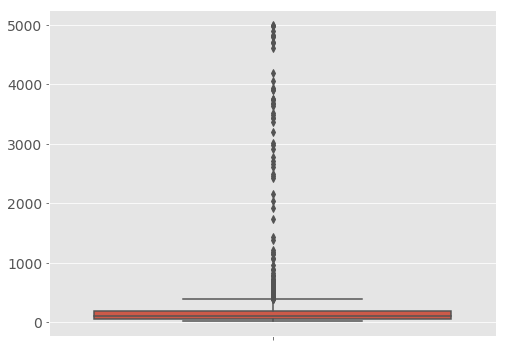

In [7]:
sb.boxplot(y=data.vm_count_for_all_tenants())

In [8]:
sum(data.vm_count_for_all_tenants())

543464

In [9]:
# sb.kdeplot(data.vm_count_for_all_tenants(), cumulative=True)

In [10]:
data.vm_count_for_all_tenants().describe()

count    3000.000000
mean      181.154667
std       433.082649
min        10.000000
25%        46.000000
50%        98.000000
75%       184.000000
max      4999.000000
dtype: float64

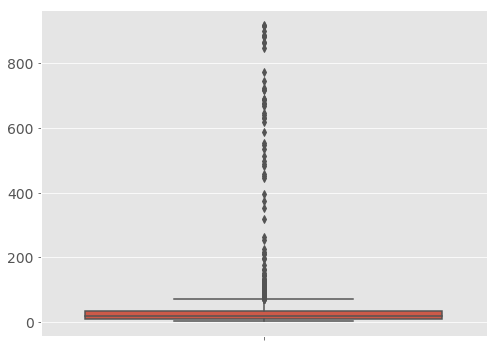

In [11]:
sb.boxplot(y=data.group_count_for_all_tenants())

In [12]:
# sb.kdeplot(data.group_count_for_all_tenants(), cumulative=True)

In [13]:
data.group_count_for_all_tenants().describe()

count    3000.000000
mean       32.837333
std        79.683976
min         1.000000
25%         8.000000
50%        18.000000
75%        33.000000
max       919.000000
dtype: float64

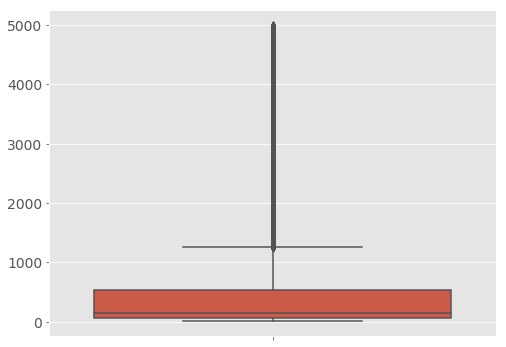

In [14]:
sb.boxplot(y=data.group_sizes_for_all_tenants())

In [15]:
# sb.kdeplot(data.group_sizes_for_all_tenants(), cumulative=True)

In [16]:
data.group_sizes_for_all_tenants().describe()

count    98512.000000
mean       615.837157
std       1012.131104
min          5.000000
25%         56.000000
50%        143.000000
75%        539.000000
max       4997.000000
dtype: float64

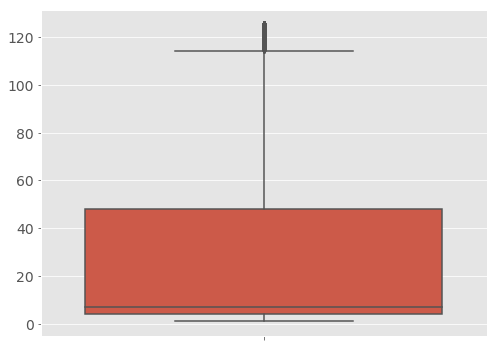

In [17]:
sb.boxplot(y=data.leafs_for_all_groups_in_all_tenants())

In [18]:
# sb.kdeplot(data.leafs_for_all_groups_in_all_tenants(), cumulative=True)

In [19]:
data.leafs_for_all_groups_in_all_tenants().describe()

count    98512.000000
mean        25.769520
std         33.396661
min          1.000000
25%          4.000000
50%          7.000000
75%         48.000000
max        125.000000
dtype: float64

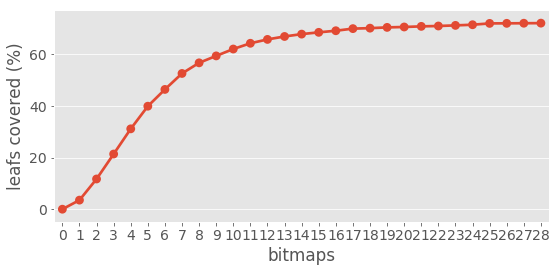

In [20]:
plot_data = pd.DataFrame()

plot_data['bitmaps'] = [i for i in range(0, NUM_BITMAPS + 1)]
plot_data['leafs covered (%)'] = data.percentage_of_groups_covered_with_varying_bitmaps(NUM_BITMAPS)

sb.factorplot(x='bitmaps', y='leafs covered (%)', data=plot_data, size=4, aspect=2)

In [21]:
data.percentage_of_groups_covered_with_varying_bitmaps(NUM_BITMAPS).describe()

count    29.000000
mean     56.594401
std      22.028137
min       0.000000
25%      52.600698
50%      67.840466
75%      70.843146
max      72.094770
dtype: float64

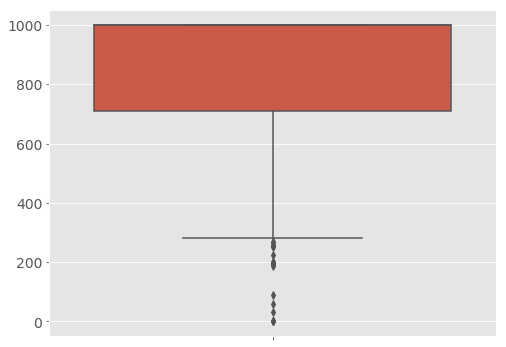

In [22]:
sb.boxplot(y=data.rules_for_all_leafs())

In [23]:
len(data.rules_for_all_leafs())

576

In [24]:
data.rules_for_all_leafs().describe()

count     576.000000
mean      846.326389
std       225.253846
min         0.000000
25%       711.000000
50%      1000.000000
75%      1000.000000
max      1000.000000
dtype: float64

progress: 100%|██████████| 3000/3000 [00:03<00:00, 798.17it/s]


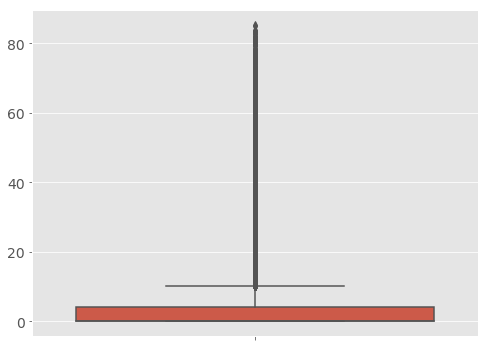

In [25]:
sb.boxplot(y=data.redundancy_for_all_groups_in_all_tenants())

In [26]:
# data.rules_for_all_groups_pre_optimization().describe()

In [27]:
# data.rules_for_all_groups_post_optimization().describe()

In [28]:
at_leaf, ut_leaf = data.traffic_stats()

progress: 100%|██████████| 3000/3000 [00:26<00:00, 113.48it/s]


In [29]:
data.traffic_overhead(at_leaf, ut_leaf)

13.786119748723404

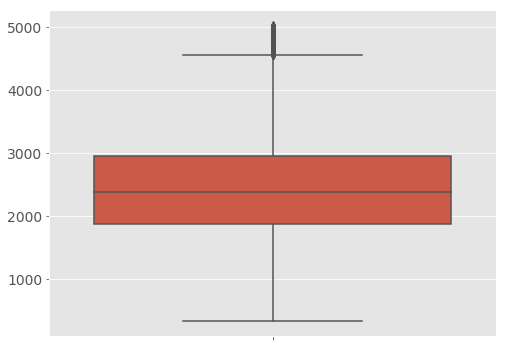

In [30]:
tt_link = data.total_traffic_per_link(at_leaf, ut_leaf)
sb.boxplot(y=tt_link)

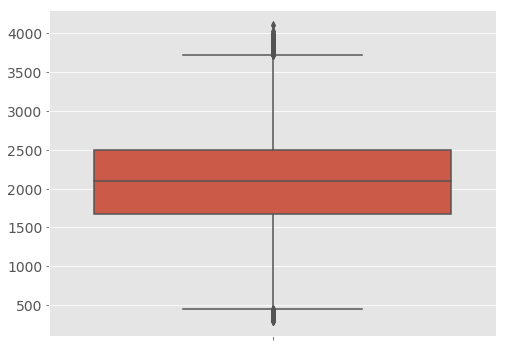

In [31]:
at_link = data.actual_traffic_per_link(at_leaf)
sb.boxplot(y=at_link)

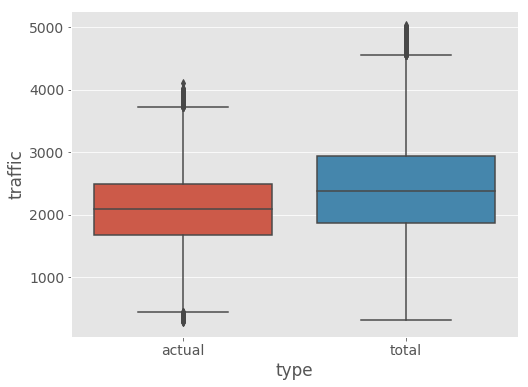

In [32]:
traffic_data = pd.DataFrame(columns=['type', 'traffic'])

at_data = pd.DataFrame()
at_data['type'] = ['actual' for _ in range(len(at_link))]
at_data['traffic'] = at_link
traffic_data = traffic_data.append(at_data)

tt_data = pd.DataFrame()
tt_data['type'] = ['total' for _ in range(len(tt_link))]
tt_data['traffic'] = tt_link
traffic_data = traffic_data.append(tt_data)

sb.boxplot(x='type', y='traffic', data=traffic_data)

In [33]:
to_link = data.traffic_overhead_per_link(tt_link, at_link)

progress: 100%|██████████| 27648/27648 [00:00<00:00, 43954.97it/s]


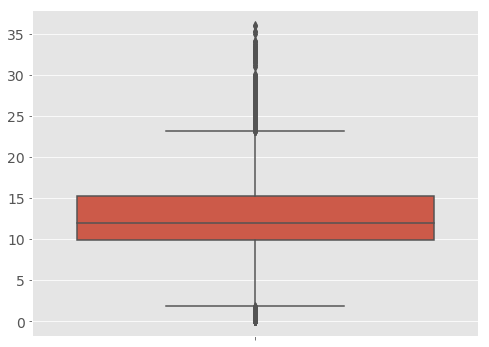

In [34]:
sb.boxplot(y=to_link)

In [35]:
to_link.describe()

count    27648.000000
mean        12.742561
std          4.278333
min          0.000000
25%          9.867944
50%         12.000000
75%         15.192696
max         36.039651
dtype: float64